In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("posts_union.csv")
data['AllText'].replace(np.nan, "", inplace = True) 

In [3]:
data["usted_norm"] = data.AllText.apply(lambda x: x.lower().count("usted") / (x.lower().count(" ") +1))
data["vos_norm"] = data.AllText.apply(lambda x: x.lower().count("vos") / (x.lower().count(" ") +1))
data["saludos_norm"] = data.AllText.apply(lambda x: x.lower().count("saludos") / (x.lower().count(" ") +1))
data["buendia_norm"] = data.AllText.apply(lambda x: x.lower().count("buen día") / (x.lower().count(" ") +1))
data["hola_norm"] = data.AllText.apply(lambda x: x.lower().count("hola") / (x.lower().count(" ") +1))
data["yo_norm"] = data.AllText.apply(lambda x: x.lower().count("yo") / (x.lower().count(" ") +1))

data["ustedes_norm"] = data.AllText.apply(lambda x: x.lower().count("ustedes") / (x.lower().count(" ") +1))
data["el_norm"] = data.AllText.apply(lambda x: x.lower().count("él") / (x.lower().count(" ") +1))
data["ella_norm"] = data.AllText.apply(lambda x: x.lower().count("ella") / (x.lower().count(" ") +1))
data["ellos_norm"] = data.AllText.apply(lambda x: x.lower().count("ellos") / (x.lower().count(" ") +1))
data["ellas_norm"] = data.AllText.apply(lambda x: x.lower().count("ellas") / (x.lower().count(" ") +1))

In [4]:
data_usuarios_norm = data[["User_Name", "red", "usted_norm", "vos_norm", "saludos_norm", 
                           "buendia_norm", "hola_norm","yo_norm", 
                           "ustedes_norm", "el_norm", "ella_norm",
                           "ellos_norm","ellas_norm"]].groupby(["User_Name","red"]).mean()

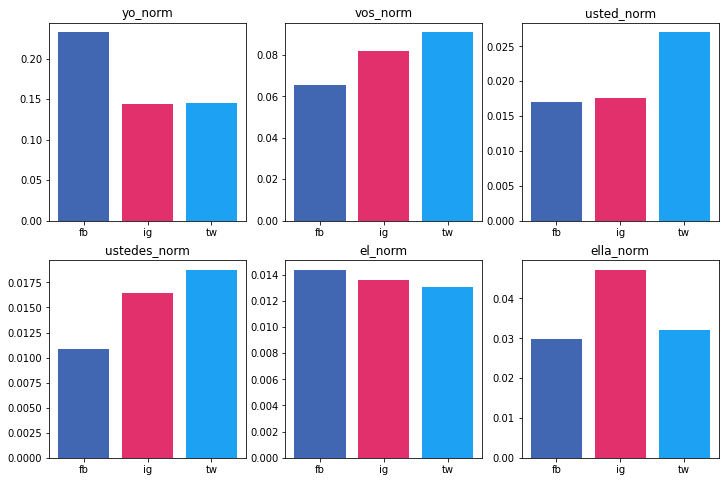

In [5]:
columns = ["yo_norm", "vos_norm","usted_norm", "ustedes_norm", "el_norm", "ella_norm"]

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for i,column in enumerate(columns): 
    axs[int(i/3),i%3].bar(data_usuarios_norm.groupby("red")[column].sum().index.values,
               data_usuarios_norm.groupby("red")[column].sum().values,
               color = ["#4267B2", "#E1306C", "#1DA1F2"])
    axs[int(i/3),i%3].set_title(column)


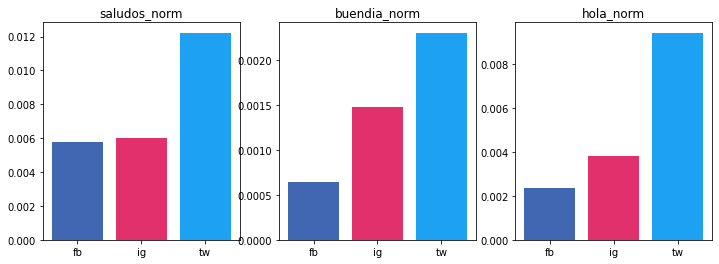

In [6]:
columns = ["saludos_norm", "buendia_norm", "hola_norm"]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i,column in enumerate(columns): 
    axs[i%3].bar(data_usuarios_norm.groupby("red")[column].sum().index.values,
               data_usuarios_norm.groupby("red")[column].sum().values,
               color = ["#4267B2", "#E1306C", "#1DA1F2"])
    axs[i%3].set_title(column)